<a href="https://colab.research.google.com/github/myungseonSim/kakao-tech/blob/main/GenAi/KTB_Day9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 과제
### 과제 1: 회귀 분석
목표: 특정 변수에 대한 선형 회귀 모델을 구축하고 평가합니다.

데이터셋: California Housing dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 훈련 데이터와 테스트 데이터로 분할합니다.
3. 선형 회귀 모델을 학습시키고, 테스트 데이터에 대해 예측합니다.
4. 예측 결과를 평가하고, MSE와 R^2 점수를 계산합니다.
5. 실제 값과 예측 값을 시각화합니다.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB

In [5]:
#데이터 생성
from sklearn.datasets import fetch_california_housing

In [8]:
# 데이터 로드
california = fetch_california_housing()
X = california.data
y = california.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)  #평균제곱오차
r2 = r2_score(y_test, y_pred)             #결정계수
print("MSE:", mse)
print("R^2:", r2)


MSE: 0.5558915986952422
R^2: 0.5757877060324524


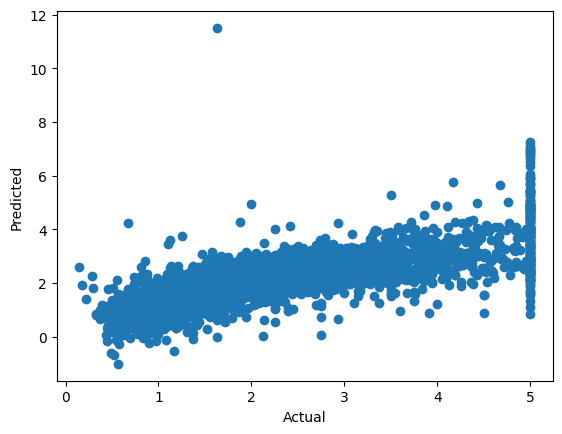

In [16]:
#시각화
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### 과제 2: 분류 분석
목표: 특정 데이터에 대한 나이브 베이즈 분류 모델을 구축하고 평가합니다.

데이터셋: Wine dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 훈련 데이터와 테스트 데이터로 분할합니다.
3. 나이브 베이즈 모델을 학습시키고, 테스트 데이터에 대해 예측합니다.
4. 예측 결과를 평가하고, 정확도와 혼동 행렬을 계산합니다.
5. 혼동 행렬을 시각화합니다.


In [18]:
from sklearn.datasets import load_wine

In [19]:
# 데이터 로드
wine = load_wine()
X = wine.data
y = wine.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
nb = GaussianNB()

# 모델 학습
nb.fit(X_train, y_train)

# 예측
y_pred = nb.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)     #정확도
cm = confusion_matrix(y_test, y_pred)         #혼동행렬
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)


Accuracy: 1.0
Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


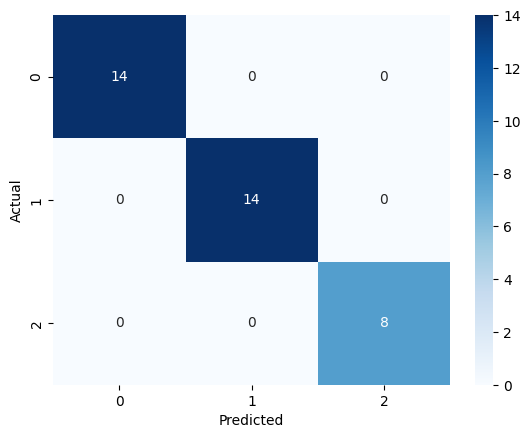

In [20]:
# 시각화
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

###과제 3: 교차 검증

목표: 데이터에 대해 교차 검증을 수행하여 모델 성능을 평가합니다.

데이터셋: Diabetes dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 나이브 베이즈 모델을 사용하여 5-겹 교차 검증을 수행합니다.
3. 교차 검증 점수를 출력하고 평균 점수를 계산합니다.
4. 교차 검증 결과를 시각화합니다.


In [22]:
from sklearn.datasets import load_diabetes

In [23]:
# 데이터 로드
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# 모델 생성
nb = GaussianNB()

# 5-겹 교차 검증
scores = cross_val_score(nb, X, y, cv=5)

# 교차 검증 점수 출력
print("Cross-validation scores:", scores)

# 평균 교차 검증 점수 계산
mean_score = scores.mean()
print("Mean cross-validation score:", mean_score)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.         0.         0.01136364 0.01136364 0.        ]
Mean cross-validation score: 0.004545454545454545


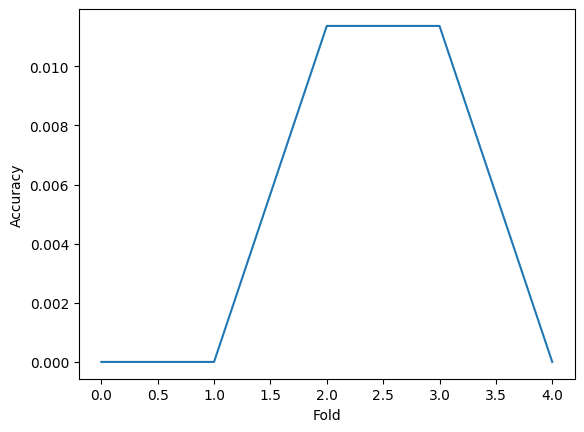

In [24]:
# 시각화
plt.plot(scores)
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.show()